DATA SET CASE STUDY

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:

data=pd.read_csv('pandas_demo.csv')
data.head(10)

,first_name,last_name,email,gender,employer,designation,university,personal_phone,bank,birth_year,years_employed
0,Otha,Gjerde,ogjerde0@biglobe.ne.jp,Female,Zomato,NaN,Sang Myung University,132-421-9138,HDFC,1970,24.0
1,Yance,Barnsdale,ybarnsdale1@reference.com,Male,Goldman Sachs,Social Worker,Fachhochschule Ravensburg-Weingarten,492-125-1131,SBI,1960,32.0
2,Lazarus,MacNish,lmacnish2@altervista.org,Male,TCS,Administrative Officer,"California State University, Channel Islands",235-492-4252,ICICI,1970,24.0
3,Monroe,Gwinnel,mgwinnel3@booking.com,Male,Goldman Sachs,Technical Writer,St. Mary-of-the-Woods College,NaN,ICICI,1982,14.4
4,Gaspard,Gullivent,ggullivent4@wikia.com,Male,Infosys,Clinical Specialist,"Islamic Azad University, Quchan",232-527-4054,ICICI,1998,1.6
5,Karna,Climar,kclimar5@boston.com,Female,Flipkart,Teacher,Patna University,765-164-9307,SBI,1968,25.6
6,Stephen,Gilbert,sgilbert6@hibu.com,Male,Goldman Sachs,Payment Adjustment Coordinator,NaN,470-960-4961,Yes Bank,1971,23.2
7,Peria,Beverage,pbeverage7@sakura.ne.jp,Female,Flipkart,Analyst Programmer,"Université Abou Bekr Belkaid, Tlemcen",876-185-6742,SBI,1971,23.2
8,Abigail,Nutton,anutton8@cnn.com,Female,Infosys,Operator,Sapporo Gakuin University,715-488-1959,ICICI,1971,23.2
9,Faunie,Lagen,flagen9@yandex.ru,Female,Zomato,Software Test Engineer I,Texas Woman's University,940-133-9120,SBI,1961,31.2


In [3]:
"""
1. Preprocessing Steps
    a. Check NaN values and imputation
    b. Data Sanitation
2. use of for loops on column value manupilation/ inbuilt apply/lambda function
3. Use of def function in column value manupilation
4. Groupby
5. Pivot_table
6. Merge operation
7. How to use and interperete Graphs
    a. linear graph
    b. scatter plots
    c. pie Plot
    d. box plot
"""

'\n1. Preprocessing Steps\n    a. Check NaN values and imputation\n    b. Data Sanitation\n2. use of for loops on column value manupilation/ inbuilt apply/lambda function\n3. Use of def function in column value manupilation\n4. Groupby\n5. Pivot_table\n6. Merge operation\n7. How to use and interperete Graphs\n    a. linear graph\n    b. scatter plots\n    c. pie Plot\n    d. box plot\n'

#  Info of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   first_name      1000 non-null   object 
 1   last_name       1000 non-null   object 
 2   email           1000 non-null   object 
 3   gender          1000 non-null   object 
 4   employer        1000 non-null   object 
 5   designation     939 non-null    object 
 6   university      892 non-null    object 
 7   personal_phone  783 non-null    object 
 8   bank            1000 non-null   object 
 9   birth_year      1000 non-null   int64  
 10  years_employed  1000 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 86.1+ KB


In [5]:
data.describe()

,birth_year,years_employed
count,1000.000000,1000.000000
mean,1978.382000,17.294400
std,11.336604,9.069283
min,1960.000000,1.600000
25%,1968.750000,9.600000
50%,1978.000000,17.600000
75%,1988.000000,25.000000
max,1998.000000,32.000000


# Preprocessing Steps

## Check for NULL (NaN) values

In [6]:
data['designation'].isnull() # gives the boolean return

0       True
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: designation, Length: 1000, dtype: bool

In [7]:
data['designation'].isnull().value_counts() # Gives the count (here 61 null values)

False    939
True      61
Name: designation, dtype: int64

In [8]:
data[data['designation'].isnull()] # show all nan values

,first_name,last_name,email,gender,employer,designation,university,personal_phone,bank,birth_year,years_employed
0,Otha,Gjerde,ogjerde0@biglobe.ne.jp,Female,Zomato,NaN,Sang Myung University,132-421-9138,HDFC,1970,24.0
17,Willdon,Bulger,wbulgerh@ustream.tv,Male,Zomato,NaN,Belgorod State University,NaN,SBI,1977,18.4
23,Margo,Searles,msearlesn@joomla.org,Female,Goldman Sachs,NaN,Huntington College,332-969-6148,SBI,1974,20.8
27,Leanor,McAuslan,lmcauslanr@domainmarket.com,Female,Flipkart,NaN,Universidade Estadual de Montes Claros,NaN,SBI,1991,7.2
49,Tracee,Swynley,tswynley1d@163.com,Female,Zomato,NaN,Sripatum University,568-535-0352,ICICI,1974,20.8
...,...,...,...,...,...,...,...,...,...,...,...
816,Gunner,Pude,gpudemo@accuweather.com,Male,Flipkart,NaN,"Veliko Turnovo University ""Cyril and Methodius""",385-783-5625,HDFC,1981,15.2
837,Elenore,Loughney,eloughneyn9@usda.gov,Female,Zomato,NaN,University of Sindh,323-271-0262,ICICI,1986,11.2
884,Thor,Giovani,tgiovaniok@accuweather.com,Male,Goldman Sachs,NaN,Daemen College,251-516-0775,HDFC,1994,4.8
952,Albertine,Skarman,askarmanqg@google.co.uk,Female,TCS,NaN,NaN,NaN,SBI,1989,8.8


In [9]:
data[data['designation'].isnull()]['employer'].value_counts() # shows which employer has null values with count

Goldman Sachs    17
Zomato           12
Google           11
Flipkart          9
Infosys           7
TCS               5
Name: employer, dtype: int64

## Null Value Imputation

### Simple fillna

In [10]:
data['new_designation']=data['designation'].fillna('entry_level_role')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   first_name       1000 non-null   object 
 1   last_name        1000 non-null   object 
 2   email            1000 non-null   object 
 3   gender           1000 non-null   object 
 4   employer         1000 non-null   object 
 5   designation      939 non-null    object 
 6   university       892 non-null    object 
 7   personal_phone   783 non-null    object 
 8   bank             1000 non-null   object 
 9   birth_year       1000 non-null   int64  
 10  years_employed   1000 non-null   float64
 11  new_designation  1000 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 93.9+ KB


### using for loop on multiple columns

In [12]:
# Assigning new roles for Nan values for different employer
nan_employer_roles={'Goldman Sachs':'banking_lvl1',
                   'Zomato':'delivery_services',
                   'Google':'developer_rolw1',
                   'Flipkart':'logistics',
                   'Infosys':'junior_associate',
                   'TCS':'junior_consultant',
    
}

#### change of NAN values

In [13]:
res_list=[]
for d in zip(data['designation'], data['employer']):
    print (d)
    if d[0]!=[0]:
        res_list.append(nan_employer_roles[d[1]])
    else:
        res_list.append(d[0])
    print(res_list[-1])
    print('@@@@')
        

(nan, 'Zomato')
delivery_services
@@@@
('Social Worker', 'Goldman Sachs')
banking_lvl1
@@@@
('Administrative Officer', 'TCS')
junior_consultant
@@@@
('Technical Writer', 'Goldman Sachs')
banking_lvl1
@@@@
('Clinical Specialist', 'Infosys')
junior_associate
@@@@
('Teacher', 'Flipkart')
logistics
@@@@
('Payment Adjustment Coordinator', 'Goldman Sachs')
banking_lvl1
@@@@
('Analyst Programmer', 'Flipkart')
logistics
@@@@
('Operator', 'Infosys')
junior_associate
@@@@
('Software Test Engineer I', 'Zomato')
delivery_services
@@@@
('Automation Specialist III', 'Zomato')
delivery_services
@@@@
('VP Quality Control', 'Zomato')
delivery_services
@@@@
('Desktop Support Technician', 'Zomato')
delivery_services
@@@@
('Project Manager', 'Flipkart')
logistics
@@@@
('Analyst Programmer', 'Zomato')
delivery_services
@@@@
('Registered Nurse', 'Goldman Sachs')
banking_lvl1
@@@@
('Dental Hygienist', 'Goldman Sachs')
banking_lvl1
@@@@
(nan, 'Zomato')
delivery_services
@@@@
('Environmental Tech', 'TCS')
juni

In [14]:
data['new_designation_2']= np.array(res_list) #adding a new column
data['new_designation_2']

0      delivery_services
1           banking_lvl1
2      junior_consultant
3           banking_lvl1
4       junior_associate
             ...        
995     junior_associate
996            logistics
997      developer_rolw1
998            logistics
999            logistics
Name: new_designation_2, Length: 1000, dtype: object

In [15]:
data.head()

,first_name,last_name,email,gender,employer,designation,university,personal_phone,bank,birth_year,years_employed,new_designation,new_designation_2
0,Otha,Gjerde,ogjerde0@biglobe.ne.jp,Female,Zomato,NaN,Sang Myung University,132-421-9138,HDFC,1970,24.0,entry_level_role,delivery_services
1,Yance,Barnsdale,ybarnsdale1@reference.com,Male,Goldman Sachs,Social Worker,Fachhochschule Ravensburg-Weingarten,492-125-1131,SBI,1960,32.0,Social Worker,banking_lvl1
2,Lazarus,MacNish,lmacnish2@altervista.org,Male,TCS,Administrative Officer,"California State University, Channel Islands",235-492-4252,ICICI,1970,24.0,Administrative Officer,junior_consultant
3,Monroe,Gwinnel,mgwinnel3@booking.com,Male,Goldman Sachs,Technical Writer,St. Mary-of-the-Woods College,NaN,ICICI,1982,14.4,Technical Writer,banking_lvl1
4,Gaspard,Gullivent,ggullivent4@wikia.com,Male,Infosys,Clinical Specialist,"Islamic Azad University, Quchan",232-527-4054,ICICI,1998,1.6,Clinical Specialist,junior_associate


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   first_name         1000 non-null   object 
 1   last_name          1000 non-null   object 
 2   email              1000 non-null   object 
 3   gender             1000 non-null   object 
 4   employer           1000 non-null   object 
 5   designation        939 non-null    object 
 6   university         892 non-null    object 
 7   personal_phone     783 non-null    object 
 8   bank               1000 non-null   object 
 9   birth_year         1000 non-null   int64  
 10  years_employed     1000 non-null   float64
 11  new_designation    1000 non-null   object 
 12  new_designation_2  1000 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 101.7+ KB


### Apply on single column

In [17]:
data['designation'].apply(lambda x:'entry_level_role' if x!=x else x)

0                    entry_level_role
1                       Social Worker
2              Administrative Officer
3                    Technical Writer
4                 Clinical Specialist
                    ...              
995               Structural Engineer
996                  Quality Engineer
997                Recruiting Manager
998                VP Quality Control
999    Payment Adjustment Coordinator
Name: designation, Length: 1000, dtype: object

### Apply on multiple column

In [18]:
def fill_nan_desig_employer(x,y): ## x == employer, y = designation
    if y!=y:
        return nan_employer_roles[x]
    else:
        return y

In [19]:
#f = lambda x,y:fill_nan_desig_employer(x,y)

In [20]:
data.apply(lambda x:fill_nan_desig_employer(x.employer,x.designation),axis = 1)

0                   delivery_services
1                       Social Worker
2              Administrative Officer
3                    Technical Writer
4                 Clinical Specialist
                    ...              
995               Structural Engineer
996                  Quality Engineer
997                Recruiting Manager
998                VP Quality Control
999    Payment Adjustment Coordinator
Length: 1000, dtype: object

In [21]:
data.head(30) #reload original data for reference

,first_name,last_name,email,gender,employer,designation,university,personal_phone,bank,birth_year,years_employed,new_designation,new_designation_2
0,Otha,Gjerde,ogjerde0@biglobe.ne.jp,Female,Zomato,NaN,Sang Myung University,132-421-9138,HDFC,1970,24.0,entry_level_role,delivery_services
1,Yance,Barnsdale,ybarnsdale1@reference.com,Male,Goldman Sachs,Social Worker,Fachhochschule Ravensburg-Weingarten,492-125-1131,SBI,1960,32.0,Social Worker,banking_lvl1
2,Lazarus,MacNish,lmacnish2@altervista.org,Male,TCS,Administrative Officer,"California State University, Channel Islands",235-492-4252,ICICI,1970,24.0,Administrative Officer,junior_consultant
3,Monroe,Gwinnel,mgwinnel3@booking.com,Male,Goldman Sachs,Technical Writer,St. Mary-of-the-Woods College,NaN,ICICI,1982,14.4,Technical Writer,banking_lvl1
4,Gaspard,Gullivent,ggullivent4@wikia.com,Male,Infosys,Clinical Specialist,"Islamic Azad University, Quchan",232-527-4054,ICICI,1998,1.6,Clinical Specialist,junior_associate
5,Karna,Climar,kclimar5@boston.com,Female,Flipkart,Teacher,Patna University,765-164-9307,SBI,1968,25.6,Teacher,logistics
6,Stephen,Gilbert,sgilbert6@hibu.com,Male,Goldman Sachs,Payment Adjustment Coordinator,NaN,470-960-4961,Yes Bank,1971,23.2,Payment Adjustment Coordinator,banking_lvl1
7,Peria,Beverage,pbeverage7@sakura.ne.jp,Female,Flipkart,Analyst Programmer,"Université Abou Bekr Belkaid, Tlemcen",876-185-6742,SBI,1971,23.2,Analyst Programmer,logistics
8,Abigail,Nutton,anutton8@cnn.com,Female,Infosys,Operator,Sapporo Gakuin University,715-488-1959,ICICI,1971,23.2,Operator,junior_associate
9,Faunie,Lagen,flagen9@yandex.ru,Female,Zomato,Software Test Engineer I,Texas Woman's University,940-133-9120,SBI,1961,31.2,Software Test Engineer I,delivery_services


## Type Casting & Data Sanitation

In [22]:
# Replace NaN in personal_phone by
"""
1.  replace 000-000-0000 (for all nan ph numbers)
2. Condition on gender and give me values (000-000-0000 for Female and 111-111-1111 for male)
3. condition on bank and get the values (000-000-0000, 111-111-1111, 222)
"""

'\n1.  replace 000-000-0000 (for all nan ph numbers)\n2. Condition on gender and give me values (000-000-0000 for Female and 111-111-1111 for male)\n3. condition on bank and get the values (000-000-0000, 111-111-1111, 222)\n'

### Replace 000-000-0000 (for all nan ph numbers)

In [23]:
data['personal_phone'].apply(lambda x:'000-000-0000' if x!=x else x)

0      132-421-9138
1      492-125-1131
2      235-492-4252
3      000-000-0000
4      232-527-4054
           ...     
995    354-283-0381
996    785-322-0735
997    585-826-1040
998    268-203-9762
999    173-701-0038
Name: personal_phone, Length: 1000, dtype: object

### Another method : Replace 000-000-0000 (for all nan ph numbers)

In [24]:
data['new_personal_phone'] = data['personal_phone'].fillna('000-000-0000')
data['new_personal_phone']

0      132-421-9138
1      492-125-1131
2      235-492-4252
3      000-000-0000
4      232-527-4054
           ...     
995    354-283-0381
996    785-322-0735
997    585-826-1040
998    268-203-9762
999    173-701-0038
Name: new_personal_phone, Length: 1000, dtype: object

### Condition on gender and give me values (000-000-0000 for Female and 111-111-1111 for male)

In [25]:
# correct solution
def fill_nan_personal_phone(x,y):
    if x!=x:
        if y=='Male':
            x='000-000-0000'
        else :
            x='111-111-1111'
    return x

In [26]:
data['new_personal_phone']=data.apply(lambda x:fill_nan_personal_phone(x.personal_phone, x.gender),axis=1)

In [27]:
data['new_personal_phone'].head(30)

0     132-421-9138
1     492-125-1131
2     235-492-4252
3     000-000-0000
4     232-527-4054
5     765-164-9307
6     470-960-4961
7     876-185-6742
8     715-488-1959
9     940-133-9120
10    340-509-3716
11    000-000-0000
12    444-758-2670
13    146-292-0039
14    578-536-7874
15    453-607-7273
16    584-504-5886
17    000-000-0000
18    715-183-6507
19    578-256-4082
20    111-111-1111
21    000-000-0000
22    102-191-5682
23    332-969-6148
24    542-135-4800
25    699-680-7632
26    278-485-3762
27    111-111-1111
28    207-579-9571
29    337-670-0605
Name: new_personal_phone, dtype: object

In [28]:
# correct solution

newphone=[]
for d in zip(data['gender'],data['personal_phone']):
    if d[0]=='Male' and d[1]!=d[1]:
        newphone.append('111-111-1111')
    elif d[0]=='Female'and d[1]!=d[1]:
        newphone.append('000-000-0000')
    else:
        newphone.append(d[1])
        
#print( newphone)
        
#data.append('newphone')
data['new2']=newphone
data['new2'].head(25)


0     132-421-9138
1     492-125-1131
2     235-492-4252
3     111-111-1111
4     232-527-4054
5     765-164-9307
6     470-960-4961
7     876-185-6742
8     715-488-1959
9     940-133-9120
10    340-509-3716
11    111-111-1111
12    444-758-2670
13    146-292-0039
14    578-536-7874
15    453-607-7273
16    584-504-5886
17    111-111-1111
18    715-183-6507
19    578-256-4082
20    000-000-0000
21    111-111-1111
22    102-191-5682
23    332-969-6148
24    542-135-4800
Name: new2, dtype: object

In [29]:
# wrong solution
mask=data['gender']=='Male'
data['Male']=mask
data.groupby('Male')['personal_phone'].fillna('111-111-1111')

0      132-421-9138
1      492-125-1131
2      235-492-4252
3      111-111-1111
4      232-527-4054
           ...     
995    354-283-0381
996    785-322-0735
997    585-826-1040
998    268-203-9762
999    173-701-0038
Name: personal_phone, Length: 1000, dtype: object

In [30]:
# wrong solution
mask=data['gender']=='Female'
data['Female']=mask
data.groupby('Female')['personal_phone'].fillna('000-000-000')

0      132-421-9138
1      492-125-1131
2      235-492-4252
3       000-000-000
4      232-527-4054
           ...     
995    354-283-0381
996    785-322-0735
997    585-826-1040
998    268-203-9762
999    173-701-0038
Name: personal_phone, Length: 1000, dtype: object

### condition on bank and get the values (000-000-0000, 111-111-1111, 222-222-2222 and so on)

In [31]:
data.head(10)

,first_name,last_name,email,gender,employer,designation,university,personal_phone,bank,birth_year,years_employed,new_designation,new_designation_2,new_personal_phone,new2,Male,Female
0,Otha,Gjerde,ogjerde0@biglobe.ne.jp,Female,Zomato,NaN,Sang Myung University,132-421-9138,HDFC,1970,24.0,entry_level_role,delivery_services,132-421-9138,132-421-9138,False,True
1,Yance,Barnsdale,ybarnsdale1@reference.com,Male,Goldman Sachs,Social Worker,Fachhochschule Ravensburg-Weingarten,492-125-1131,SBI,1960,32.0,Social Worker,banking_lvl1,492-125-1131,492-125-1131,True,False
2,Lazarus,MacNish,lmacnish2@altervista.org,Male,TCS,Administrative Officer,"California State University, Channel Islands",235-492-4252,ICICI,1970,24.0,Administrative Officer,junior_consultant,235-492-4252,235-492-4252,True,False
3,Monroe,Gwinnel,mgwinnel3@booking.com,Male,Goldman Sachs,Technical Writer,St. Mary-of-the-Woods College,NaN,ICICI,1982,14.4,Technical Writer,banking_lvl1,000-000-0000,111-111-1111,True,False
4,Gaspard,Gullivent,ggullivent4@wikia.com,Male,Infosys,Clinical Specialist,"Islamic Azad University, Quchan",232-527-4054,ICICI,1998,1.6,Clinical Specialist,junior_associate,232-527-4054,232-527-4054,True,False
5,Karna,Climar,kclimar5@boston.com,Female,Flipkart,Teacher,Patna University,765-164-9307,SBI,1968,25.6,Teacher,logistics,765-164-9307,765-164-9307,False,True
6,Stephen,Gilbert,sgilbert6@hibu.com,Male,Goldman Sachs,Payment Adjustment Coordinator,NaN,470-960-4961,Yes Bank,1971,23.2,Payment Adjustment Coordinator,banking_lvl1,470-960-4961,470-960-4961,True,False
7,Peria,Beverage,pbeverage7@sakura.ne.jp,Female,Flipkart,Analyst Programmer,"Université Abou Bekr Belkaid, Tlemcen",876-185-6742,SBI,1971,23.2,Analyst Programmer,logistics,876-185-6742,876-185-6742,False,True
8,Abigail,Nutton,anutton8@cnn.com,Female,Infosys,Operator,Sapporo Gakuin University,715-488-1959,ICICI,1971,23.2,Operator,junior_associate,715-488-1959,715-488-1959,False,True
9,Faunie,Lagen,flagen9@yandex.ru,Female,Zomato,Software Test Engineer I,Texas Woman's University,940-133-9120,SBI,1961,31.2,Software Test Engineer I,delivery_services,940-133-9120,940-133-9120,False,True


In [32]:
data_bank = data[["bank", "personal_phone"]]

data_bank.head(10)

,bank,personal_phone
0,HDFC,132-421-9138
1,SBI,492-125-1131
2,ICICI,235-492-4252
3,ICICI,NaN
4,ICICI,232-527-4054
5,SBI,765-164-9307
6,Yes Bank,470-960-4961
7,SBI,876-185-6742
8,ICICI,715-488-1959
9,SBI,940-133-9120


In [33]:
ban=[]
for d in zip(data['bank'],data['personal_phone']):
    if d[0]=='HDFC' and d[1]!=d[1]:
        ban.append('000-000-0000')
        
    elif d[0]=='SBI'and d[1]!=d[1]:
        ban.append('111-111-1111')
        
    elif d[0]=='ICICI'and d[1]!=d[1]:
        ban.append('222-222-2222')
        
    elif d[0]=='Yes Bank'and d[1]!=d[1]:
        ban.append('333-333-3333')
    else:
        ban.append(d[1])
        

data['new_ban']=ban
data['new_ban'].head(25)

0     132-421-9138
1     492-125-1131
2     235-492-4252
3     222-222-2222
4     232-527-4054
5     765-164-9307
6     470-960-4961
7     876-185-6742
8     715-488-1959
9     940-133-9120
10    340-509-3716
11    333-333-3333
12    444-758-2670
13    146-292-0039
14    578-536-7874
15    453-607-7273
16    584-504-5886
17    111-111-1111
18    715-183-6507
19    578-256-4082
20    222-222-2222
21    111-111-1111
22    102-191-5682
23    332-969-6148
24    542-135-4800
Name: new_ban, dtype: object

### Replace the hypen '-' from the personal_phone

In [34]:
data['new_personal_phone'].apply(lambda x: x.replace('-',''))

0      1324219138
1      4921251131
2      2354924252
3      0000000000
4      2325274054
          ...    
995    3542830381
996    7853220735
997    5858261040
998    2682039762
999    1737010038
Name: new_personal_phone, Length: 1000, dtype: object

### In university replace space and all special charevters by _

In [35]:
data['university']

0                             Sang Myung University
1              Fachhochschule Ravensburg-Weingarten
2      California State University, Channel Islands
3                     St. Mary-of-the-Woods College
4                   Islamic Azad University, Quchan
                           ...                     
995                       Universidad Adolfo Ibáñez
996                               Stonehill College
997          University of the South Pacific Centre
998                        Bulacan State University
999                              Arcadia University
Name: university, Length: 1000, dtype: object

In [36]:
def get_valid_string(x):
    res = ''
    for c in x:
#         print(c)
        if not c.isalpha():
            if c==' ':
                res+='_'
            else:
                res+=''
        else:
            res+=c
    return res

In [37]:
data['university'].fillna('',inplace = True)

In [38]:
data['university'].apply(lambda x:get_valid_string(x))

0                            Sang_Myung_University
1              Fachhochschule_RavensburgWeingarten
2      California_State_University_Channel_Islands
3                        St_MaryoftheWoods_College
4                   Islamic_Azad_University_Quchan
                          ...                     
995                      Universidad_Adolfo_Ibáñez
996                              Stonehill_College
997         University_of_the_South_Pacific_Centre
998                       Bulacan_State_University
999                             Arcadia_University
Name: university, Length: 1000, dtype: object

In [39]:
def str_replace(x):
    res=''
    for c in x:
        if not c.isalpha():
            if c==" ":
                res+="_"
            else:
                res+=''
        else:
            res+=c
    print(res)
    return res
data.university.fillna('',inplace=True)
data.apply(lambda x: str_replace(x.university), axis=1)

Sang_Myung_University
Fachhochschule_RavensburgWeingarten
California_State_University_Channel_Islands
St_MaryoftheWoods_College
Islamic_Azad_University_Quchan
Patna_University

Université_Abou_Bekr_Belkaid_Tlemcen
Sapporo_Gakuin_University
Texas_Womans_University
Ternopil_Academy_of_National_Economy
Universidade_de_Caxias_do_Sul
Universidade_Federal_de_São_Paulo
Fukuoka_Institute_of_Technology
Capitol_University
Fachhochschule_für_die_Wirtschaft
Instituto_Politécnico_de_Tomar
Belgorod_State_University
Warnborough_University
Luxun_Academy_of_Fine_Art
Hyupsung_University
The_Interdisciplinary_Center_Herzliya
University_of_Southern_California
Huntington_College
London_Guildhall_University
Northern_Michigan_University
Universidad_Técnica_Particular_de_Loja
Universidade_Estadual_de_Montes_Claros


Istanbul_Bilgi_University
University_of_Hormozgan
Belmont_University

Saratov_State_University
Lulea_University_of_Technology

University_College_of_Kristianstad
Universidad_de_Ciencias_Empresaria

0                            Sang_Myung_University
1              Fachhochschule_RavensburgWeingarten
2      California_State_University_Channel_Islands
3                        St_MaryoftheWoods_College
4                   Islamic_Azad_University_Quchan
                          ...                     
995                      Universidad_Adolfo_Ibáñez
996                              Stonehill_College
997         University_of_the_South_Pacific_Centre
998                       Bulacan_State_University
999                             Arcadia_University
Length: 1000, dtype: object

## Groupby

 certain value needs to be aggregated then groupbe can be used

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   first_name          1000 non-null   object 
 1   last_name           1000 non-null   object 
 2   email               1000 non-null   object 
 3   gender              1000 non-null   object 
 4   employer            1000 non-null   object 
 5   designation         939 non-null    object 
 6   university          1000 non-null   object 
 7   personal_phone      783 non-null    object 
 8   bank                1000 non-null   object 
 9   birth_year          1000 non-null   int64  
 10  years_employed      1000 non-null   float64
 11  new_designation     1000 non-null   object 
 12  new_designation_2   1000 non-null   object 
 13  new_personal_phone  1000 non-null   object 
 14  new2                1000 non-null   object 
 15  Male                1000 non-null   bool   
 16  Female 

In [41]:
# groupby 'birth year'
data[['birth_year','years_employed']].groupby(by=['birth_year'],as_index = False).mean()

,birth_year,years_employed
0,1960,32.0
1,1961,31.2
2,1962,30.4
3,1963,29.6
4,1964,28.8
5,1965,28.0
6,1966,27.2
7,1967,26.4
8,1968,25.6
9,1969,24.8


In [42]:
# groupby 'employer'
data[['employer','years_employed']].groupby(by=['employer'],as_index = False).mean()

,employer,years_employed
0,Flipkart,17.293413
1,Goldman Sachs,16.838095
2,Google,18.400000
3,Infosys,17.906173
4,TCS,15.204762
5,Zomato,18.120805


In [43]:
unique_employers=data['employer'].unique()

employer_years_exp=[]
employers=[]
for emp in unique_employers:
    print()
    emp_data=data[data['employer']==emp]
    years_exp_mean=emp_data['years_employed'].mean()
    employers.append(emp)
    employer_years_exp.append(years_exp_mean)
emp_dict={'employer': employers,
        'mean_years_exp': employer_years_exp}
pd.DataFrame(emp_data)
    


,first_name,last_name,email,gender,employer,designation,university,personal_phone,bank,birth_year,years_employed,new_designation,new_designation_2,new_personal_phone,new2,Male,Female,new_ban
31,Hugh,Langsbury,hlangsburyv@phoca.cz,Male,Google,Registered Nurse,University of Hormozgan,370-225-1392,Yes Bank,1981,15.2,Registered Nurse,developer_rolw1,370-225-1392,370-225-1392,True,False,370-225-1392
34,Ninon,Charville,ncharvilley@loc.gov,Female,Google,Financial Analyst,Saratov State University,NaN,ICICI,1965,28.0,Financial Analyst,developer_rolw1,111-111-1111,000-000-0000,False,True,222-222-2222
43,Rudolfo,Rudinger,rrudinger17@blinklist.com,Male,Google,Payment Adjustment Coordinator,,288-846-4152,SBI,1971,23.2,Payment Adjustment Coordinator,developer_rolw1,288-846-4152,288-846-4152,True,False,288-846-4152
60,Leonardo,Medendorp,lmedendorp1o@apache.org,Male,Google,Environmental Tech,Academy of Public Administration,937-606-4664,HDFC,1977,18.4,Environmental Tech,developer_rolw1,937-606-4664,937-606-4664,True,False,937-606-4664
62,Sayre,Thomel,sthomel1q@biblegateway.com,Male,Google,General Manager,Instituto Superior Politécnico e Universitário,456-711-9429,Yes Bank,1995,4.0,General Manager,developer_rolw1,456-711-9429,456-711-9429,True,False,456-711-9429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,Isabeau,Tomczykiewicz,itomczykiewiczqs@europa.eu,Female,Google,Teacher,Ecole Française d'Electronique et d'Informatique,321-287-0267,HDFC,1961,31.2,Teacher,developer_rolw1,321-287-0267,321-287-0267,False,True,321-287-0267
978,Fredelia,Vallantine,fvallantiner6@istockphoto.com,Female,Google,Data Coordiator,,699-880-7480,Yes Bank,1966,27.2,Data Coordiator,developer_rolw1,699-880-7480,699-880-7480,False,True,699-880-7480
979,Walton,Hairs,whairsr7@europa.eu,Male,Google,Cost Accountant,Ardabil University of Medical Sciences,188-396-7968,Yes Bank,1980,16.0,Cost Accountant,developer_rolw1,188-396-7968,188-396-7968,True,False,188-396-7968
989,Carolyne,Reitenbach,creitenbachrh@canalblog.com,Female,Google,Senior Sales Associate,Technological University (Pinlon),703-644-6126,HDFC,1996,3.2,Senior Sales Associate,developer_rolw1,703-644-6126,703-644-6126,False,True,703-644-6126


In [44]:
# grpby function using FOR loop

uniq_employers = data['employer'].unique()

employer_years_exp = []
employers = []
for emp in uniq_employers:
    print('employer is ',emp)
    emp_data = data[data['employer']==emp]
    print('number of employees ',emp_data.shape[0])
    years_exp_mean = emp_data['years_employed'].mean()
    employers.append(emp)
    employer_years_exp.append(years_exp_mean)
    print('employee mean years of experience ',years_exp_mean)

emp_dict = {'employer':employers,
           'mean_years_exp':employer_years_exp}

pd.DataFrame(emp_dict)


employer is  Zomato
number of employees  149
employee mean years of experience  18.12080536912752
employer is  Goldman Sachs
number of employees  168
employee mean years of experience  16.838095238095235
employer is  TCS
number of employees  168
employee mean years of experience  15.204761904761902
employer is  Infosys
number of employees  162
employee mean years of experience  17.906172839506173
employer is  Flipkart
number of employees  167
employee mean years of experience  17.293413173652695
employer is  Google
number of employees  186
employee mean years of experience  18.400000000000002


,employer,mean_years_exp
0,Zomato,18.120805
1,Goldman Sachs,16.838095
2,TCS,15.204762
3,Infosys,17.906173
4,Flipkart,17.293413
5,Google,18.400000


In [45]:
data.groupby('gender', as_index=False)['years_employed'].mean()


,gender,years_employed
0,Female,16.801575
1,Male,17.803252


## Pivot

1. Index: what aggregation level you want, 
2. column: aggregation with respect to what values, 
3. Values: what value you want to agg

In [46]:
data[['employer','birth_year','years_employed',]].pivot_table(index = ['employer'],columns = ['birth_year'],values=['years_employed'],aggfunc = np.mean)

years_employed                                                  \
birth_year              1960  1961  1962  1963  1964  1965  1966  1967  1968   
employer                                                                       
Flipkart                32.0  31.2  30.4  29.6  28.8  28.0   NaN  26.4  25.6   
Goldman Sachs           32.0  31.2  30.4  29.6  28.8  28.0  27.2  26.4  25.6   
Google                  32.0  31.2  30.4  29.6  28.8  28.0  27.2  26.4  25.6   
Infosys                 32.0  31.2  30.4  29.6  28.8  28.0  27.2  26.4  25.6   
TCS                     32.0  31.2  30.4  29.6  28.8  28.0  27.2  26.4  25.6   
Zomato                  32.0  31.2  30.4  29.6  28.8  28.0  27.2  26.4  25.6   

                     ...                                                    
birth_year     1969  ... 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998  
employer             ...                                                    
Flipkart       24.8  ...  8.8  8.0  7.2  6.4  5.6  4.8  4.0  3.2  2.4  1.6  
Goldman Sachs  24.8  ...  8.8  8.0  7.2  6.4  5.6  4.8  4.0  3.2  2.4  1.6  
Google         24.8  ...  8.8  8.0  7.2  6.4  5.6  4.8  4.0  3.2  2.4  1.6  
Infosys        24.8  ...  8.8  8.0  7.2  6.4  5.6  4.8  4.0  3.2  2.4  1.6  
TCS            24.8  ...  8.8  8.0  7.2  6.4  5.6  4.8  4.0  3.2  NaN  1.6  
Zomato         24.8  ...  8.8  8.0  7.2  6.4  5.6  4.8  4.0  3.2  2.4  1.6  

[6 rows x 39 columns]

In [47]:
df_gender_employer = data[['employer','gender','years_employed',]].pivot_table(index = ['employer'],columns = ['gender'],values=['years_employed'],aggfunc = np.mean)

In [48]:
df_gender_employer

years_employed           
gender                Female       Male
employer                               
Flipkart           17.330233  17.254321
Goldman Sachs      16.536471  17.146988
Google             17.934066  18.846316
Infosys            17.024390  18.810000
TCS                14.843478  15.642105
Zomato             17.300000  18.888312

## Plots

In [49]:
import seaborn as sns

In [51]:
df_bank_employer = data[['employer','bank','years_employed',]].pivot_table(index = ['employer'],columns= ['bank'],values=['years_employed'],aggfunc = np.mean)

### Heatmaps

In [52]:
df_bank_employer

years_employed                                 
bank                    HDFC      ICICI        SBI   Yes Bank
employer                                                     
Flipkart           15.513043  17.538462  18.791489  17.348571
Goldman Sachs      16.127273  15.300000  18.380952  17.504762
Google             19.898182  16.423529  18.283636  18.190476
Infosys            16.775758  18.761905  17.380392  18.688889
TCS                16.204651  14.720000  14.773333  15.154286
Zomato             18.632258  17.491892  18.527273  17.837838

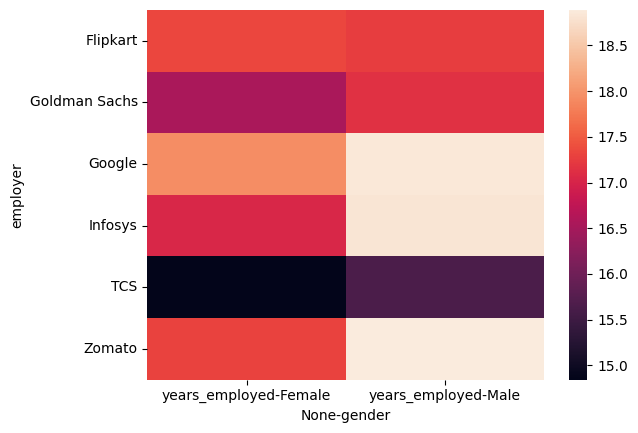

In [53]:
ax = sns.heatmap(df_gender_employer)

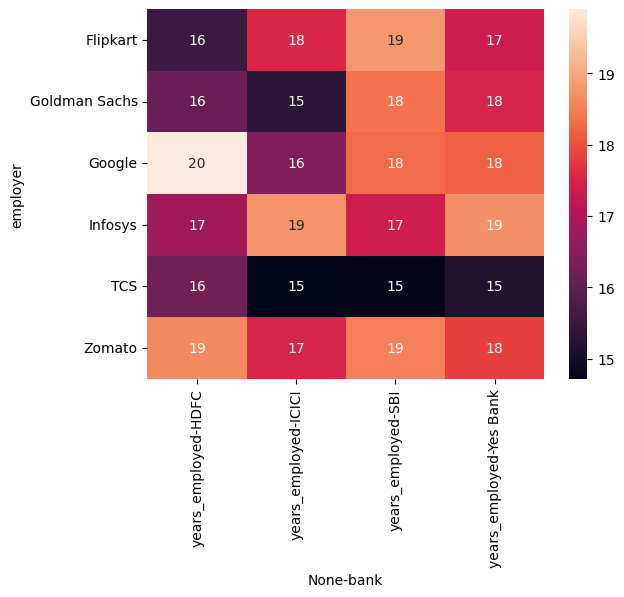

In [54]:
ax = sns.heatmap(df_bank_employer,annot=True)

### line Chart

In [60]:
data_emp_years_exp = data[['employer','years_employed']].groupby(by = ['employer'],as_index = False).mean()

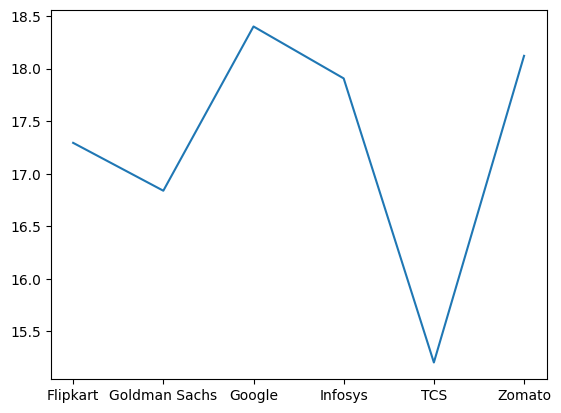

In [61]:
## plt.xlabel(),plt.ylabel(),plt.title()
plt.plot(data_emp_years_exp['employer'],data_emp_years_exp['years_employed'])
plt.show()

### Scatter

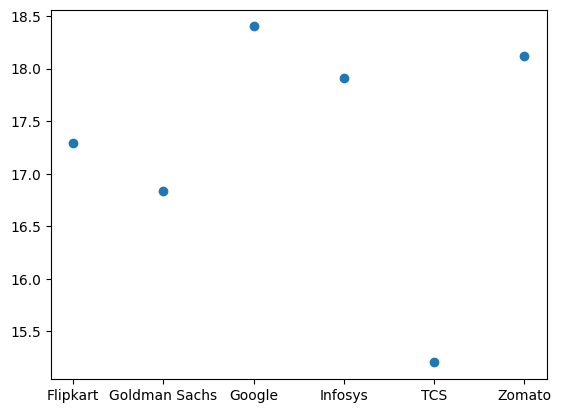

In [62]:
plt.scatter(data_emp_years_exp['employer'],data_emp_years_exp['years_employed'])
plt.show()

### Pie Chart

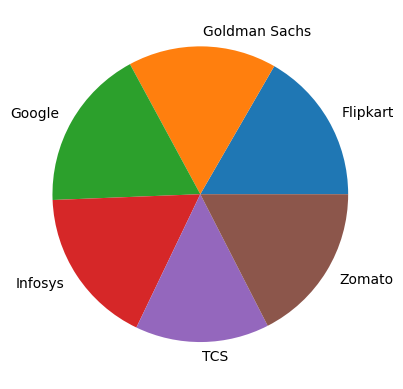

In [63]:
plt.pie(data_emp_years_exp['years_employed'],labels=data_emp_years_exp['employer'])
plt.show()

In [64]:
data_emp_years_exp

,employer,years_employed
0,Flipkart,17.293413
1,Goldman Sachs,16.838095
2,Google,18.400000
3,Infosys,17.906173
4,TCS,15.204762
5,Zomato,18.120805


### Box plots

In [65]:
df_bank_employer

years_employed                                 
bank                    HDFC      ICICI        SBI   Yes Bank
employer                                                     
Flipkart           15.513043  17.538462  18.791489  17.348571
Goldman Sachs      16.127273  15.300000  18.380952  17.504762
Google             19.898182  16.423529  18.283636  18.190476
Infosys            16.775758  18.761905  17.380392  18.688889
TCS                16.204651  14.720000  14.773333  15.154286
Zomato             18.632258  17.491892  18.527273  17.837838

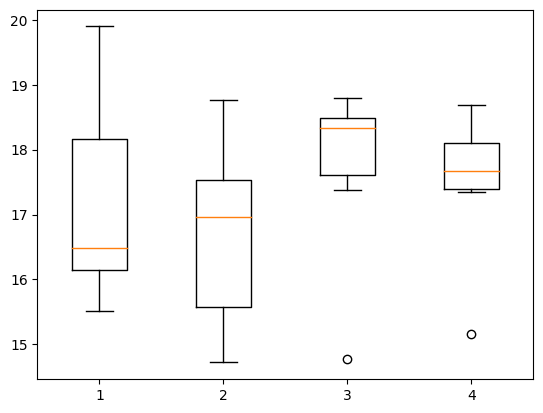

In [66]:
plt.boxplot(df_bank_employer)
plt.show()